In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw

from sklearn.cluster import AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, HDBSCAN, OPTICS, Birch

In [2]:
# データセット可視化メソッド
def plot_data(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

# クラスタリング結果可視化メソッド
def plot_result(X_train, y_train, y_pred, name):
    plt.figure(figsize=(12,5))

    # true
    plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=1)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name} True')

    # pred
    plt.subplot(1,2,2)

    label = np.unique(y_pred)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_pred == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}',
                color=colors[class_label - 1])

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.title(f'{name} Pred')
    plt.tight_layout()
    plt.show()

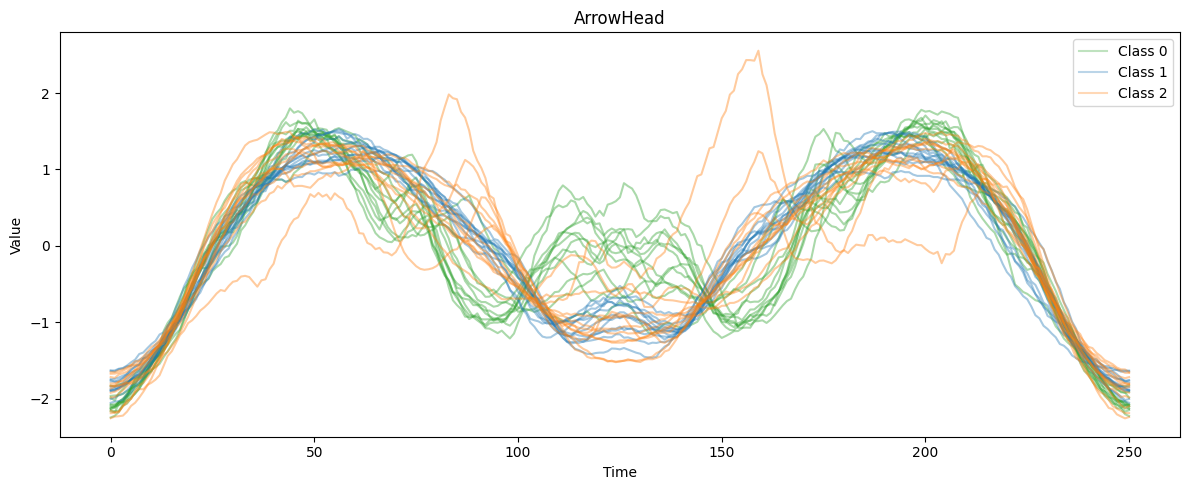

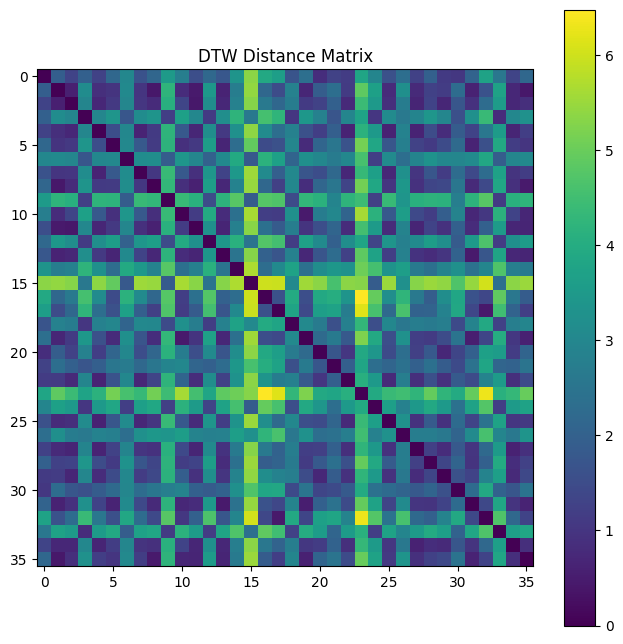

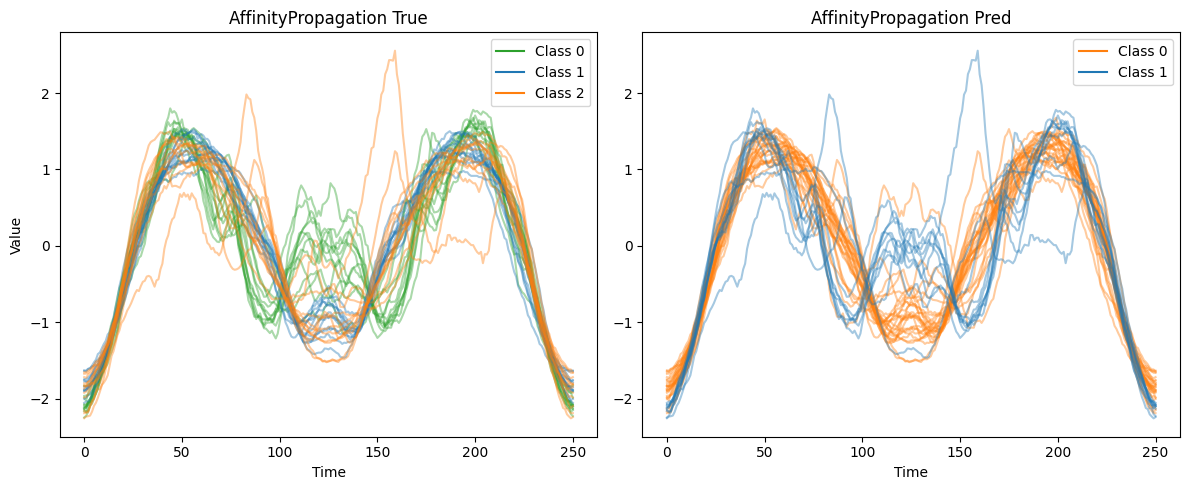

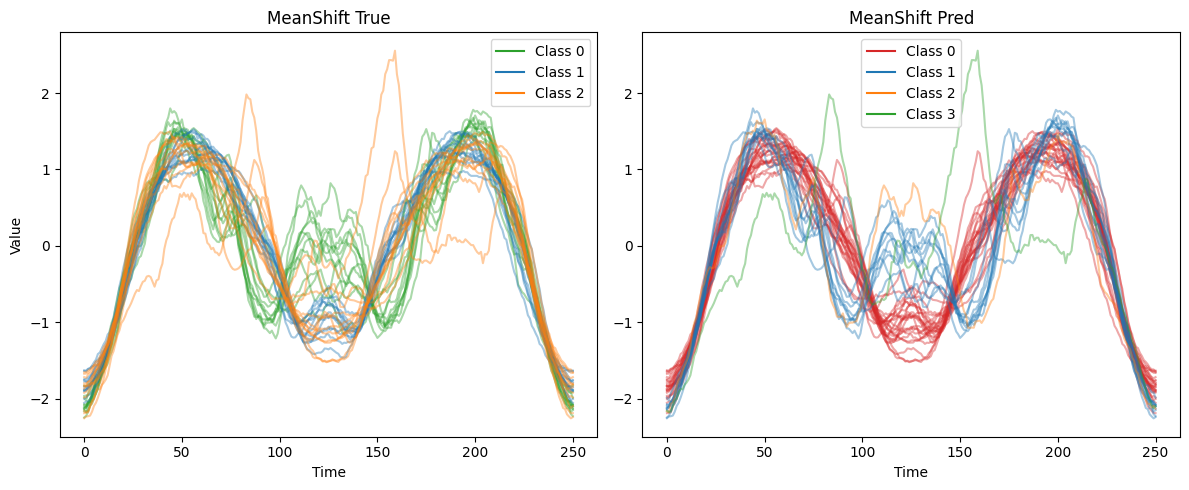

/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


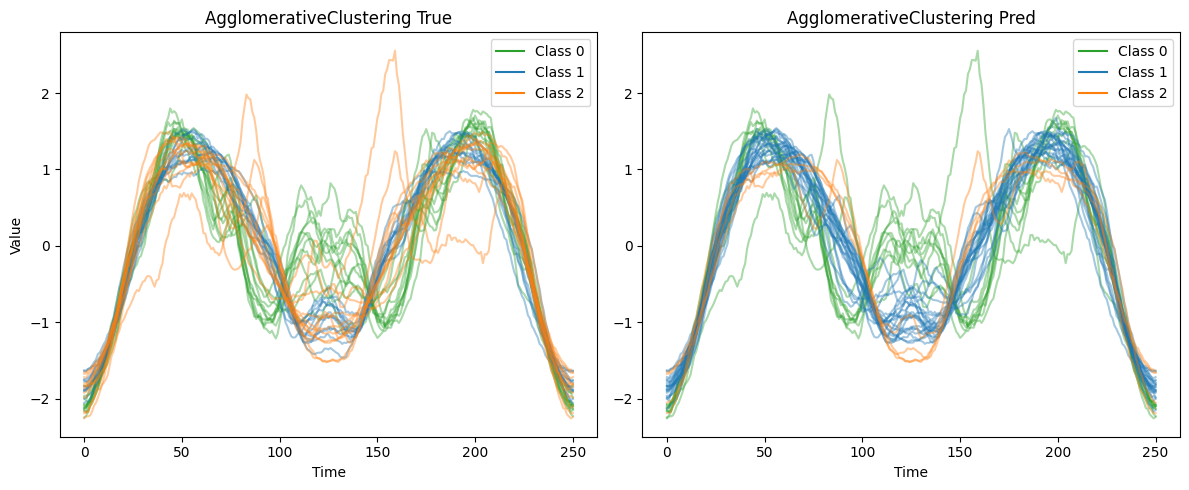

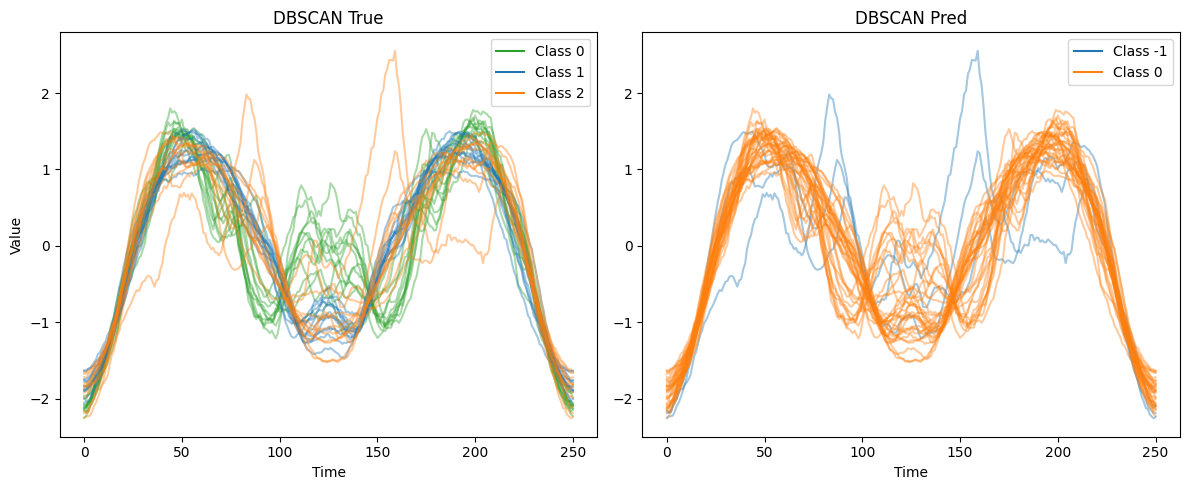

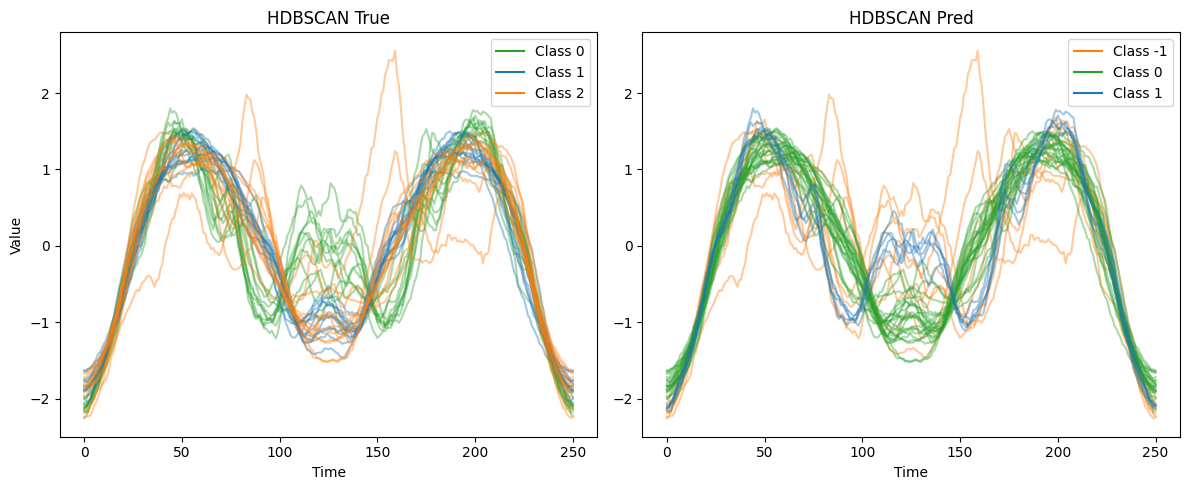

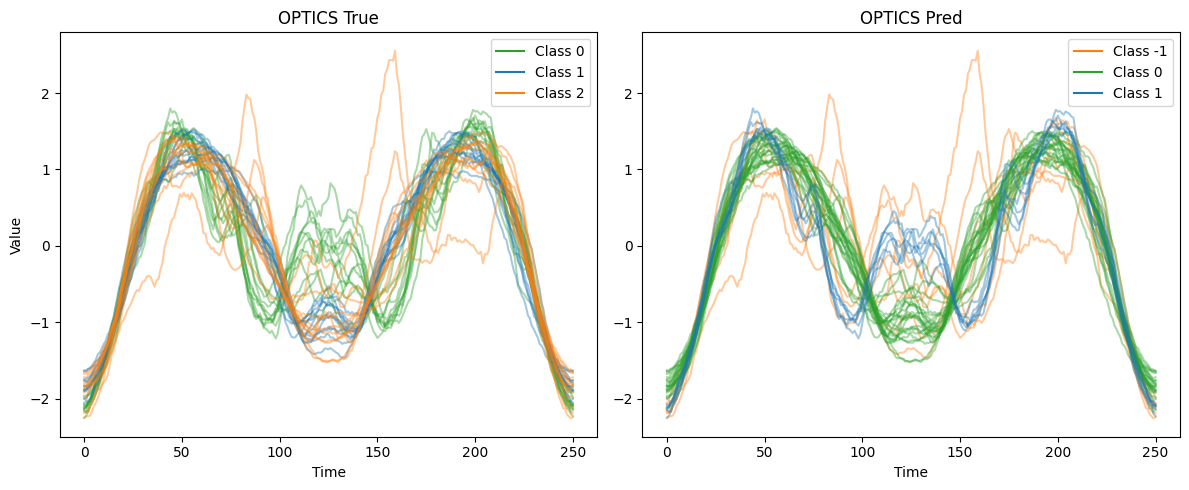

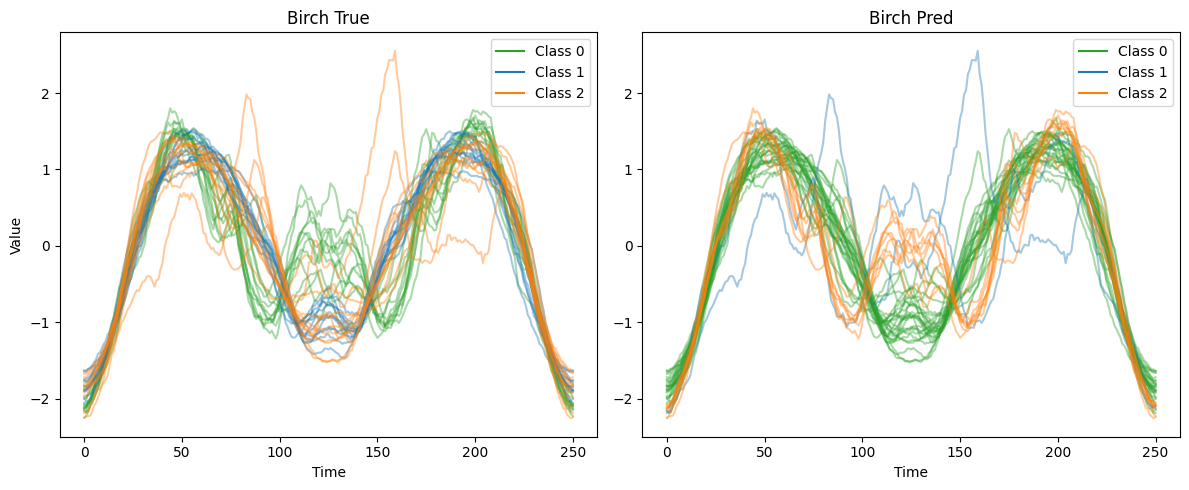

In [6]:
data_name = 'ArrowHead'
models = {
    'AffinityPropagation':AffinityPropagation(random_state=5, affinity='precomputed'),
    'MeanShift':MeanShift(),
    'AgglomerativeClustering':AgglomerativeClustering(n_clusters=3, metric='euclidean',),
    'DBSCAN':DBSCAN(
            eps=2, # neighborhoodと判定する距離の上限
            metric='precomputed',
        ),
    'HDBSCAN':HDBSCAN(
            metric='precomputed',
        ),
    'OPTICS':OPTICS(
            metric='precomputed',
        ),
    'Birch':Birch(
            n_clusters=3,
        ),
}

# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)
# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()


for name, model in models.items():
    model.fit(distance_matrix)
    plot_result(X_train, y_train, model.labels_, f'{name}')

